In [2]:
!pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
# Load the CSV file into a DataFrame (like a table)
df = pd.read_csv('uber-raw-data-sep14.csv')

# Display the first 5 rows to check it loaded correctly
print(df.head())

          Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512


In [5]:
# Show basic info about the dataset
print(df.info())

# Show summary statistics (e.g., averages for Lat/Lon)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB
None
                Lat           Lon
count  1.028136e+06  1.028136e+06
mean   4.073922e+01 -7.397182e+01
std    4.082861e-02  5.831413e-02
min    3.998970e+01 -7.477360e+01
25%    4.072040e+01 -7.399620e+01
50%    4.074180e+01 -7.398310e+01
75%    4.076120e+01 -7.396280e+01
max    4.134760e+01 -7.271630e+01


In [6]:
# Convert 'Date/Time' column to datetime objects
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M:%S')

# Extract day of the week (0=Monday, 6=Sunday)
df['DayOfWeek'] = df['Date/Time'].dt.dayofweek

# Extract hour of the day (0-23)
df['Hour'] = df['Date/Time'].dt.hour

# Display the updated first 5 rows
print(df.head())

            Date/Time      Lat      Lon    Base  DayOfWeek  Hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512          0     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512          0     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512          0     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512          0     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512          0     0


In [7]:
# Group by DayOfWeek and count rides
rides_per_day = df.groupby('DayOfWeek').size().reset_index(name='Rides')

# Map numbers to day names for readability
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
rides_per_day['DayName'] = rides_per_day['DayOfWeek'].map(day_map)

# Find busiest day
busiest_day = rides_per_day.loc[rides_per_day['Rides'].idxmax()]
print(f"Busiest day: {busiest_day['DayName']} with {busiest_day['Rides']} rides")

# Display all days
print(rides_per_day)

Busiest day: Tuesday with 163230 rides
   DayOfWeek   Rides    DayName
0          0  137288     Monday
1          1  163230    Tuesday
2          2  135373  Wednesday
3          3  153276   Thursday
4          4  160380     Friday
5          5  162057   Saturday
6          6  116532     Sunday


In [8]:
# Group by Hour and count rides
rides_per_hour = df.groupby('Hour').size().reset_index(name='Rides')

# Find hour with lowest rides
lowest_hour = rides_per_hour.loc[rides_per_hour['Rides'].idxmin()]
print(f"Hour with lowest rides: {lowest_hour['Hour']}:00 with {lowest_hour['Rides']} rides")

# Display all hours
print(rides_per_hour)

Hour with lowest rides: 2:00 with 10702 rides
    Hour  Rides
0      0  24133
1      1  16107
2      2  10702
3      3  10789
4      4  12675
5      5  20262
6      6  33307
7      7  43314
8      8  44477
9      9  38542
10    10  37634
11    11  38821
12    12  39193
13    13  45042
14    14  52643
15    15  61219
16    16  68224
17    17  73373
18    18  75040
19    19  69660
20    20  63988
21    21  60606
22    22  51817
23    23  36568


In [9]:
# Group by Hour and count rides
rides_per_hour = df.groupby('Hour').size().reset_index(name='Rides')

# Find hour with lowest rides
lowest_hour = rides_per_hour.loc[rides_per_hour['Rides'].idxmin()]
print(f"Hour with lowest rides: {lowest_hour['Hour']}:00 with {lowest_hour['Rides']} rides")

# Display all hours
print(rides_per_hour)

Hour with lowest rides: 2:00 with 10702 rides
    Hour  Rides
0      0  24133
1      1  16107
2      2  10702
3      3  10789
4      4  12675
5      5  20262
6      6  33307
7      7  43314
8      8  44477
9      9  38542
10    10  37634
11    11  38821
12    12  39193
13    13  45042
14    14  52643
15    15  61219
16    16  68224
17    17  73373
18    18  75040
19    19  69660
20    20  63988
21    21  60606
22    22  51817
23    23  36568


C:\Users\acer\AppData\Local\Temp\ipykernel_10664\1858782533.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayName', y='Rides', data=rides_per_day, palette='viridis')


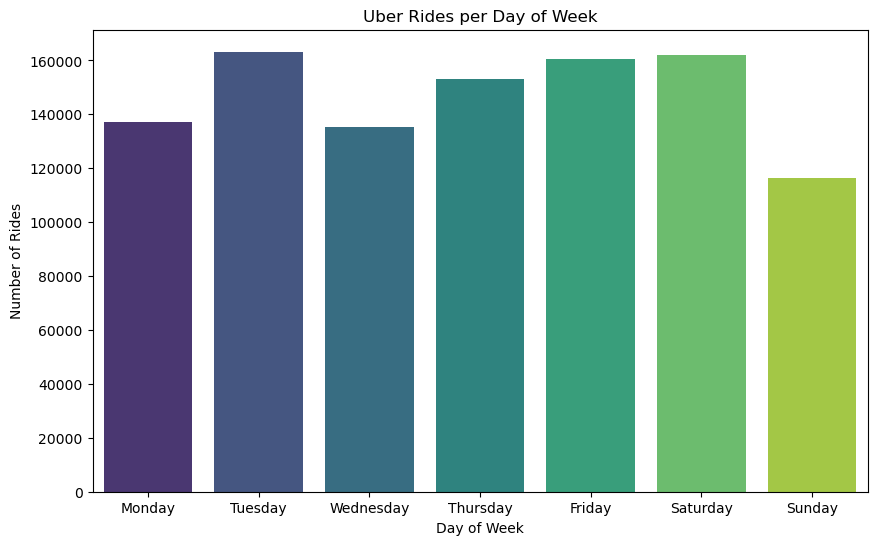

In [10]:
# Bar plot for rides per day
plt.figure(figsize=(10,6))
sns.barplot(x='DayName', y='Rides', data=rides_per_day, palette='viridis')
plt.title('Uber Rides per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.show()

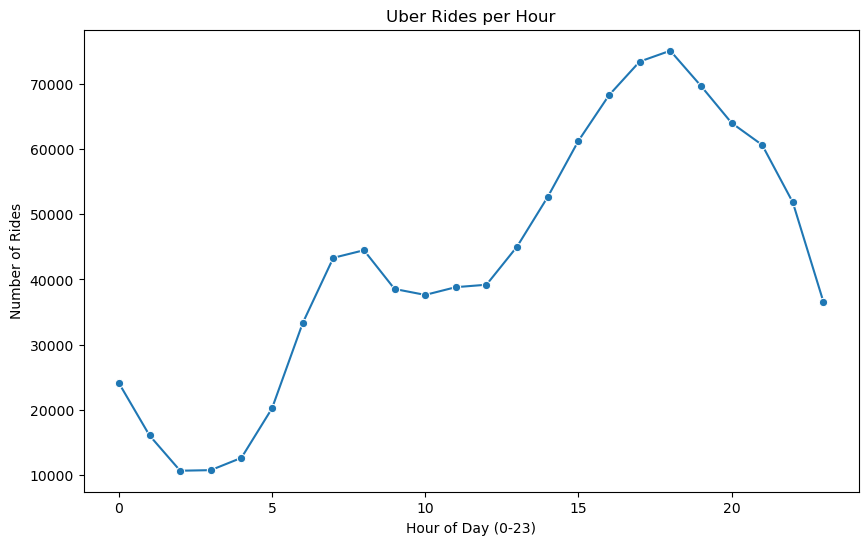

In [11]:
# Line plot for rides per hour
plt.figure(figsize=(10,6))
sns.lineplot(x='Hour', y='Rides', data=rides_per_hour, marker='o')
plt.title('Uber Rides per Hour')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Rides')
plt.show()

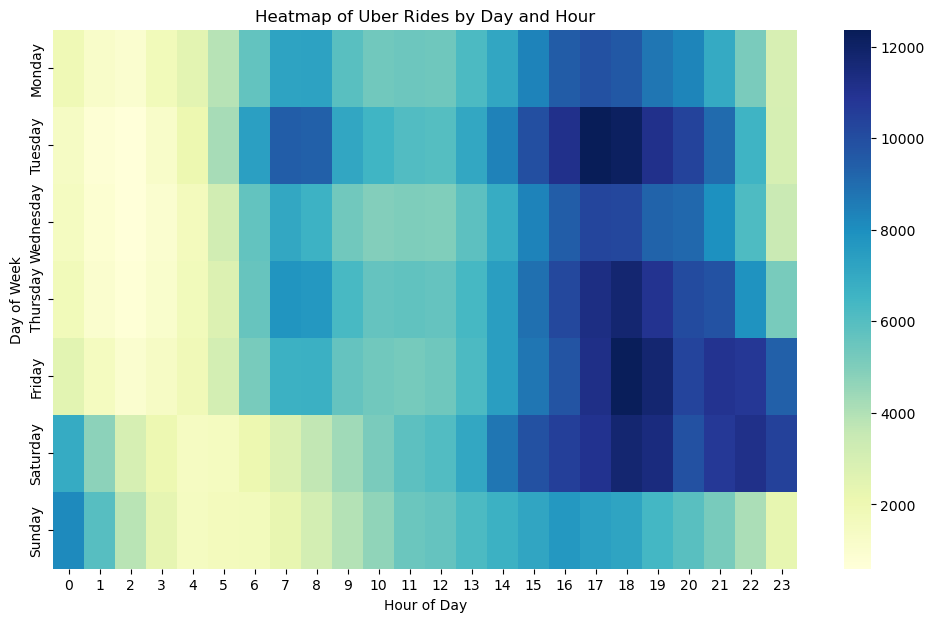

In [12]:
# Pivot table for heatmap (rides by day and hour)
pivot = df.pivot_table(index='DayOfWeek', columns='Hour', aggfunc='size', fill_value=0)

# Map day numbers to names
pivot.index = pivot.index.map(day_map)

# Heatmap
plt.figure(figsize=(12,7))
sns.heatmap(pivot, cmap='YlGnBu', annot=False)
plt.title('Heatmap of Uber Rides by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()